# Лабораторная работа №6. Статистические методы отбора признаков
## Задание 1: Отбор признаков с использованием корреляционных матриц.
Для начала, используйте датасет о винах из sklearn.datasets. Найти корреляционную матрицу для датасета и, дополнительно, визуализируйте ее с помощью seaborn. 

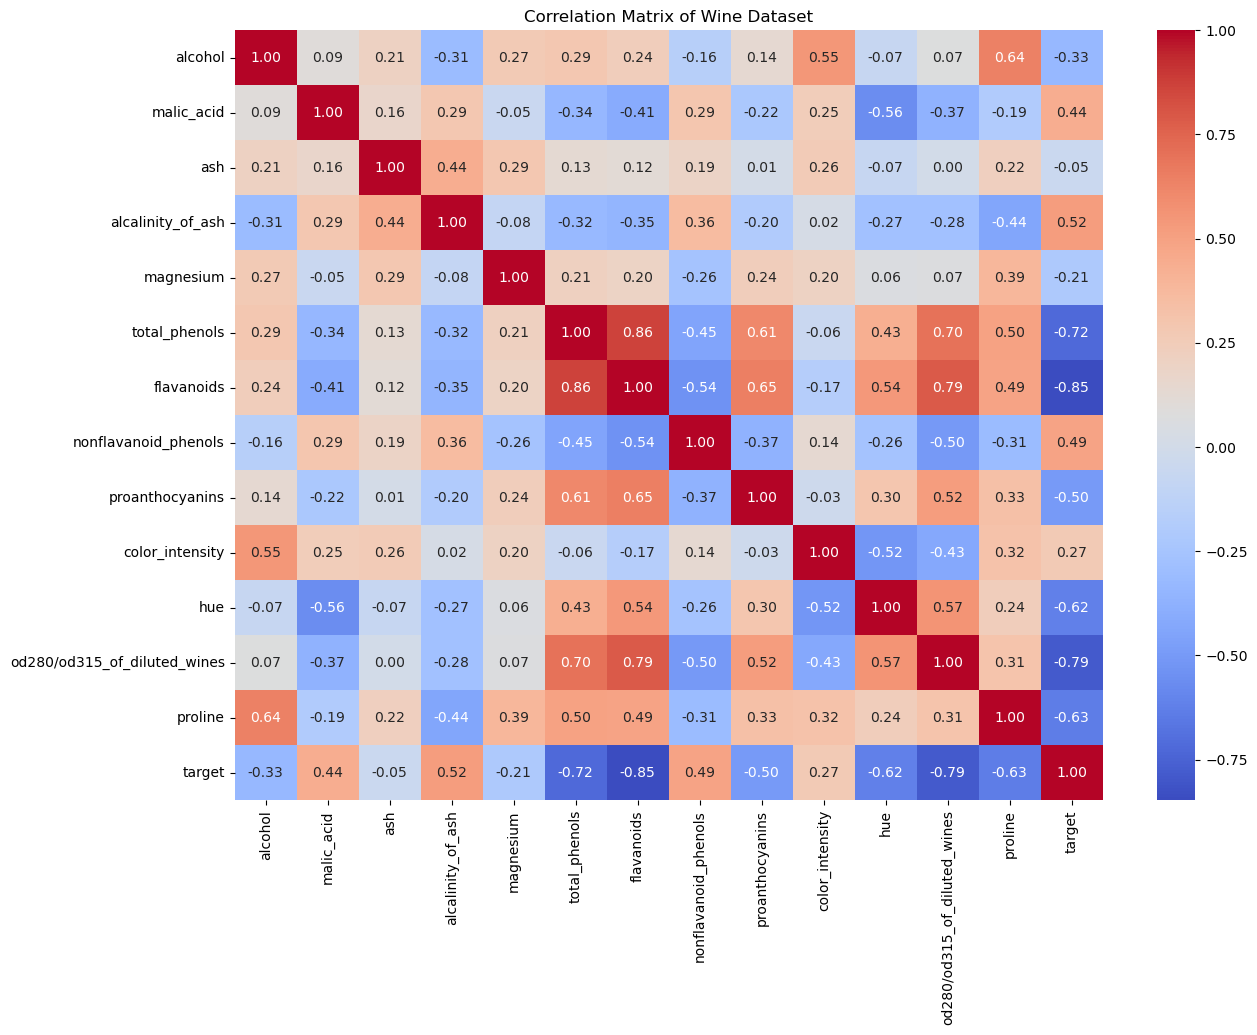

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine

# Загрузка данных
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target  # Добавляем целевые значения

# Вычисляем корреляцию между признаками
corr_matrix = wine_df.corr()

# Отображаем тепловую карту
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Wine Dataset')
plt.show()

## Задание 2: Отбор признаков на основе важности признаков в случайном лесе.
Используйте тот же датасет и подгоните модель RandomForestRegressor к вашим данным, затем используйте атрибут feature_importances_ чтобы определить наиболее важные признаки.

/tmp/ipykernel_61300/1492634972.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='magma')


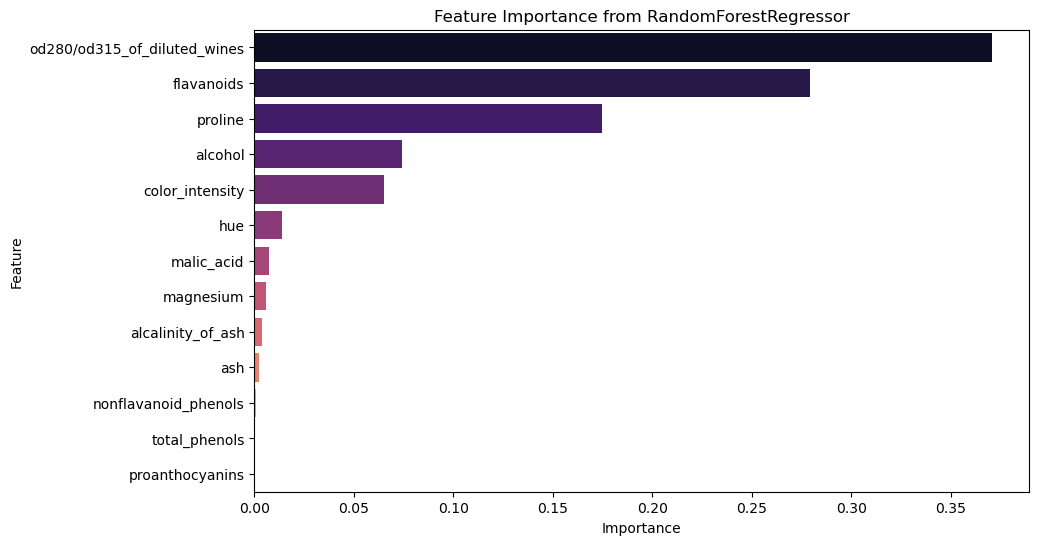

In [6]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

# Подготовка данных
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели и обучение
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Получение важности признаков
feature_importances = rf_model.feature_importances_

# Создание DataFrame для отображения важности признаков
importance_df = pd.DataFrame({
    'Feature': wine_data.feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='magma')
plt.title('Feature Importance from RandomForestRegressor')
plt.show()

### Задание 3: Использование выбора признаков на основе p-value.
Для этого задания можно использовать набор данных Boston Housing из sklearn.datasets.

In [3]:
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing

# Загрузка данных
california = fetch_california_housing()
data_frame = pd.DataFrame(california.data, columns=california.feature_names)
data_frame['target'] = california.target

# Подготовка данных
X = data_frame.drop('target', axis=1)
y = data_frame['target']

# Добавляем константу для модели
X = sm.add_constant(X)

# Строим модель линейной регрессии
ols_model = sm.OLS(y, X).fit()

# Печатаем резюме модели для анализа p-value
print(ols_model.summary())

# Устанавливаем порог для значимости
threshold = 0.05
significant_vars = ols_model.pvalues[ols_model.pvalues < threshold].index
print("Significant variables based on p-value:", significant_vars)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sat, 21 Dec 2024   Prob (F-statistic):               0.00
Time:                        03:20:02   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

### Задание 4: Отбор признаков с помощь метода взаимной информации.
Используйте любой датасет, с которым вам приятно работать. Установите библиотеку sklearn и примените функцию mutual_info_classif или mutual_info_regression для отбора признаков.

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

# Загрузка данных
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Подготовка данных
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Вычисление взаимной информации
mi = mutual_info_regression(X_scaled, y)

# Создание DataFrame для отображения результатов
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Печать результатов
print(mi_df)

             Feature  Mutual Information
3   petal width (cm)            1.035061
2  petal length (cm)            0.969387
0  sepal length (cm)            0.540706
1   sepal width (cm)            0.246149


### Задание 5: Используйте метод Recursive Feature Elimination на том же датасете.
Постройте модель, например, линейную регрессию или SVM, и используйте RFE для выбора лучшего подмножества признаков.

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Загрузка данных
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Подготовка данных
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Инициализация модели
lr_model = LinearRegression()

# Инициализация RFE с отбором 2 признаков
rfe_selector = RFE(estimator=lr_model, n_features_to_select=2)
rfe_selector.fit(X_scaled, y)

# Отбор признаков
selected_features_rfe = X.columns[rfe_selector.support_]
print("Selected Features by RFE:", selected_features_rfe)

Selected Features by RFE: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


### Задание 6: Сравните различные методы отбора признаков. 
Примените каждый из методов отбора признаков к одному и тому же датасету, а затем сравните производительность моделей машинного обучения, обученных на этих различных подмножествах признаков.

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import load_iris

# Загружаем датасет
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Разделение данных на признаки и целевую переменную
X = df.drop(columns=['target'])
y = df['target']

# Набор для хранения подмножеств признаков
selected_features = {}

# Метод 1 - Корреляционная матрица
correlations = X.corrwith(y).abs()
corr_selected = correlations[correlations > 0.2].index  # Признаки с корреляцией > 0.2
selected_features['Correlation'] = X[corr_selected]

# Метод 2 - RandomForestRegressor
forest = RandomForestRegressor(random_state=0)
forest.fit(X, y)
importance = pd.Series(forest.feature_importances_, index=X.columns)
important_features = importance.nlargest(2).index  # Топ-2 важных признаков для iris
selected_features['RandomForest'] = X[important_features]

# Метод 3 - p-value
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
p_values = model.pvalues[1:]  # Пропускаем константу
pvalue_selected = p_values[p_values < 0.05].index  # Признаки с p-value < 0.05
selected_features['p-value'] = X[pvalue_selected]

# Метод 4 - Mutual Information
mi = mutual_info_regression(X, y, random_state=0)
mi_series = pd.Series(mi, index=X.columns)
mi_selected = mi_series.nlargest(2).index  # Топ-2 признаков по взаимной информации для iris
selected_features['Mutual Information'] = X[mi_selected]

# Метод 5 - RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=2)
rfe.fit(X, y)
rfe_selected = X.columns[rfe.support_]
selected_features['RFE'] = X[rfe_selected]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

results = {}

for method, features in selected_features.items():
    # Создаем и обучаем модель линейной регрессии
    model = LinearRegression()
    model.fit(features.loc[X_train.index], y_train)
    
    # Оценка на тестовом наборе
    y_pred = model.predict(features.loc[X_test.index])
    r2 = r2_score(y_test, y_pred)
    
    # Сохранение результатов
    results[method] = r2
    print(f"{method} R^2 Score: {r2}")

print("\nМетод с наибольшим значением R² свидетельствует о наиболее эффективном способе выбора признаков.")

Correlation R^2 Score: 0.9055032992676105
RandomForest R^2 Score: 0.8992771169971924
p-value R^2 Score: 0.8992771169971924
Mutual Information R^2 Score: 0.8992771169971924
RFE R^2 Score: 0.8992771169971924

Метод с наибольшим значением R² свидетельствует о наиболее эффективном способе выбора признаков.


# Задание 07. Методы отбора признаков
## Корреляционные методы отбора признаков
### Задание 1: Работа с корреляционной матрицей.
Используйте набор данных "Iris" из sklearn.datasets. Вычислите корреляционную матрицу числовых признаков. Затем визуализируйте эту матрицу с помощью heatmap в библиотеке seaborn.

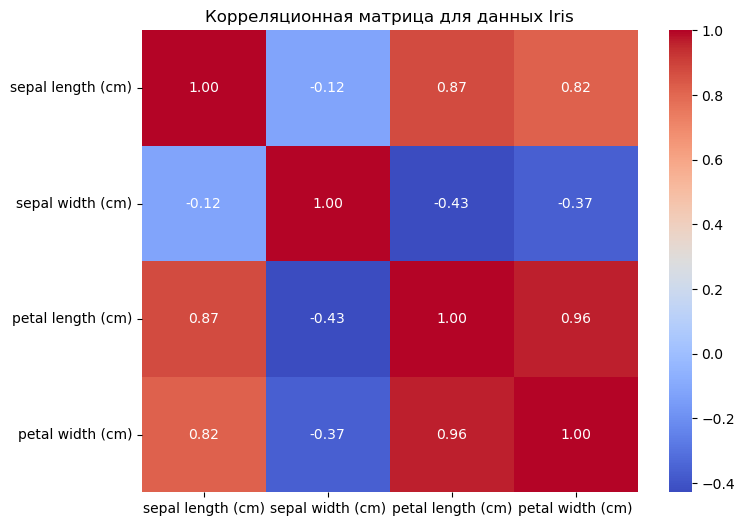

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Загрузка набора данных Iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Вычисление корреляционной матрицы
corr_matrix = X.corr()

# Визуализация с помощью heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Корреляционная матрица для данных Iris')
plt.show()

### Задание 2: Исключение мультиколлинеарных признаков.
Используйте набор данных "Wine" из sklearn.datasets. Вычислите корреляционную матрицу, а затем найдите и исключите признаки, у которых корреляция друг с другом превышает заданный порог.

In [5]:
import numpy as np
from sklearn.datasets import load_wine

# Загрузка набора данных Wine
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Вычисление корреляционной матрицы
corr_matrix = X.corr()

# Порог для мультиколлинеарности
threshold = 0.75

# Находим признаки, которые имеют корреляцию выше порога
to_drop = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            if colname not in to_drop:
                to_drop.append(colname)

# Исключаем признаки с высокой корреляцией
X_reduced = X.drop(columns=to_drop)

print(f'Удаленные признаки: {to_drop}')
print(f'Количество признаков после исключения: {X_reduced.shape[1]}')

Удаленные признаки: ['flavanoids', 'od280/od315_of_diluted_wines']
Количество признаков после исключения: 11


### Задание 3: Выбор наиболее значимых признаков.
Используйте набор данных "Boston Housing" из sklearn.datasets. Вычислите коэффициенты корреляции между каждым признаком и целевой переменной, затем выберите n признаков с наибольшим абсолютным значением коэффициента.

In [8]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Загрузка набора данных California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Вычисление коэффициентов корреляции между признаками и целевой переменной
corr_with_target = X.corrwith(y).abs()

# Сортировка по убыванию абсолютного значения корреляции
top_n = 5  # выберем 5 признаков с наибольшей корреляцией
top_features = corr_with_target.sort_values(ascending=False).head(top_n)

print(f'Признаки с наибольшей корреляцией с целевой переменной: \n{top_features}')

Признаки с наибольшей корреляцией с целевой переменной: 
MedInc       0.688075
AveRooms     0.151948
Latitude     0.144160
HouseAge     0.105623
AveBedrms    0.046701
dtype: float64


### Задание 4: Применение Ранговой корреляции Спирмена.
Используйте любой набор данных, имеющий порядковые признаки. Примените корреляцию Спирмена для выбора наиболее значимых признаков.

In [13]:
import pandas as pd
import seaborn as sns

titanic_data = sns.load_dataset('titanic')

titanic_data['embarked'] = titanic_data['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})

selected_features = titanic_data[['pclass', 'sex', 'age', 'fare', 'survived', 'embarked']]

spearman_corr_matrix = selected_features.corr(method='spearman')

correlation_threshold = 0.25
important_features = spearman_corr_matrix['survived'][spearman_corr_matrix['survived'].abs() > correlation_threshold]

print("Значимые признаки по ранговой корреляции Спирмена:")
print(important_features)

Значимые признаки по ранговой корреляции Спирмена:
pclass     -0.339668
sex         0.543351
fare        0.323736
survived    1.000000
Name: survived, dtype: float64


### Задание 5: Сравнение методов отбора признаков.
Используйте один и тот же набор данных для применения различных методов отбора признаков, включая корреляционные методы, и сравните результаты.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV

wine_data = load_wine()
features = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
target = pd.Series(data=wine_data.target, name='target')
target_one_hot = pd.get_dummies(target, prefix='species')

correlation_matrix = features.corr()
correlation_with_first_class = features.corrwith(target_one_hot['species_0'])
correlation_with_first_class = correlation_with_first_class.abs()
highly_correlated_features = correlation_with_first_class[correlation_with_first_class > 0.7].index.tolist()

# Используем Random Forest для выбора признаков
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(features, target)
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
rf_top_features = features.columns[sorted_indices][:3].tolist()

lasso_model = LassoCV(cv=5, random_state=42)
lasso_model.fit(features, target)
lasso_top_features = features.columns[(lasso_model.coef_ != 0)].tolist()

print("Признаки, отобранные методом Lasso:")
print(lasso_top_features)
print()

print("Признаки, отобранные методом корреляции:")
print(highly_correlated_features)
print()

print("Признаки, отобранные методом Random Forest:")
print(rf_top_features)

Признаки, отобранные методом Lasso:
['alcalinity_of_ash', 'flavanoids', 'color_intensity', 'proline']

Признаки, отобранные методом корреляции:
['proline']

Признаки, отобранные методом Random Forest:
['flavanoids', 'color_intensity', 'alcohol']


### Задание 6: Исследование влияния предобработки данных на результаты корреляционного анализа.
Примените различные методы предобработки (например, нормализацию, стандартизацию, логарифмирование) к данным перед вычислением корреляции и сравните полученные результаты.

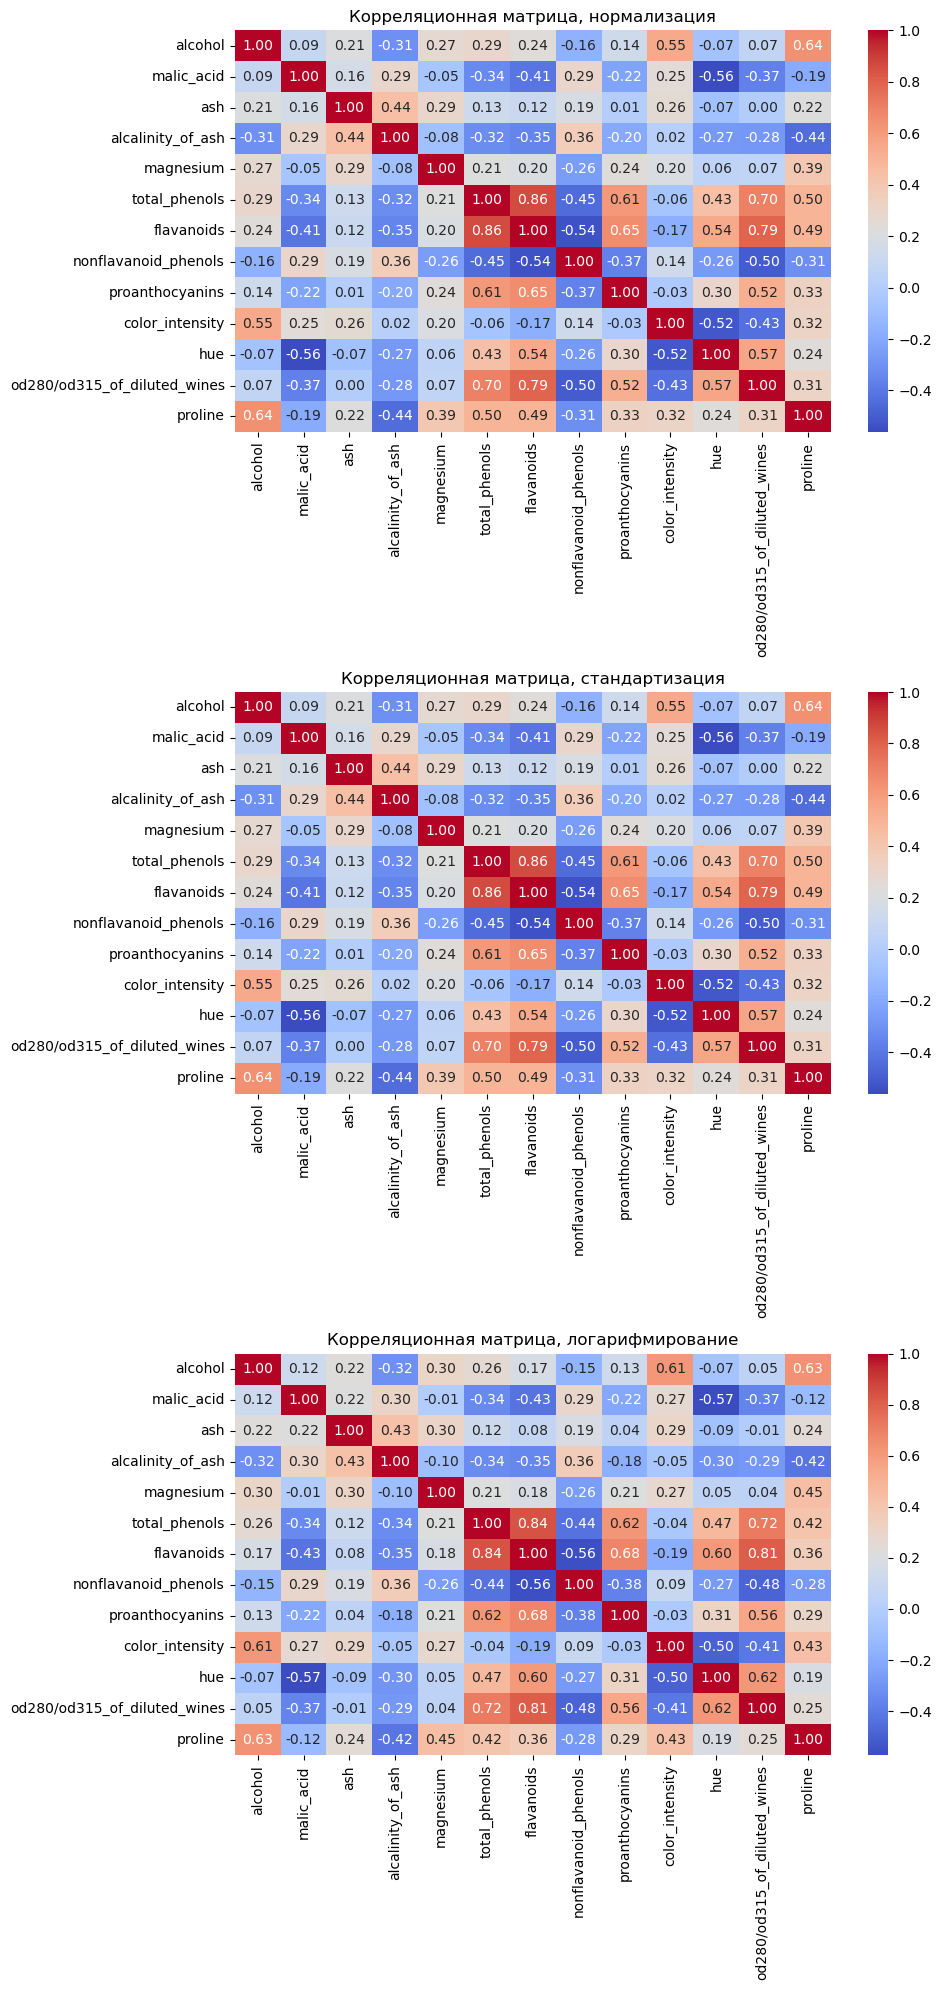

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Загружаем данные о вине
wine_data = load_wine()
features = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# Применяем нормализацию
minmax_scaler = MinMaxScaler()
normalized_data = minmax_scaler.fit_transform(features)

# Применяем стандартизацию
standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(features)

log_transformed_data = np.log1p(features)

normalized_corr = pd.DataFrame(normalized_data, columns=features.columns).corr()
standardized_corr = pd.DataFrame(standardized_data, columns=features.columns).corr()
log_transformed_corr = pd.DataFrame(log_transformed_data, columns=features.columns).corr()

# Визуализируем результаты
plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
sns.heatmap(normalized_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица, нормализация')

plt.subplot(3, 1, 2)
sns.heatmap(standardized_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица, стандартизация')

plt.subplot(3, 1, 3)
sns.heatmap(log_transformed_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица, логарифмирование')

plt.tight_layout()
plt.show()

## Методы-обертки
### Задание 1: Рекурсивное исключение признаков (RFE).
Используйте набор данных "Iris" из sklearn.datasets. Примените метод RFE с использованием модели логистической регрессии. Укажите количество признаков для выбора и сравните производительность модели с и без этих признаков.

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель логистической регрессии
model = LogisticRegression(max_iter=200)

# Применение RFE
n_features_to_select = 2  # Количество признаков для выбора
rfe = RFE(model, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

# Признаки, выбранные RFE
selected_features = np.where(rfe.support_)[0]
print("Выбранные признаки:", selected_features)

# Оценка производительности модели с выбранными признаками
model.fit(X_train[:, selected_features], y_train)
y_pred_rfe = model.predict(X_test[:, selected_features])
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print("Точность модели с RFE:", accuracy_rfe)

# Оценка производительности модели без RFE
model.fit(X_train, y_train)
y_pred_full = model.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)
print("Точность модели без RFE:", accuracy_full)

Выбранные признаки: [2 3]
Точность модели с RFE: 1.0
Точность модели без RFE: 1.0


###  Задание 2: Sequential Feature Selector.
Используйте набор данных "Boston Housing" из sklearn.datasets. Используйте Sequential Feature Selector для выбора признаков с использованием модели Random Forest. Визуализируйте "важность" признаков.

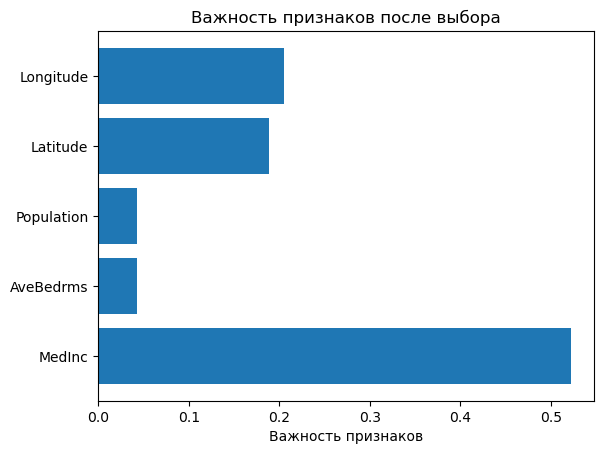

In [33]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

# Загрузка данных California Housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель Random Forest
model = RandomForestRegressor()

# Применение Sequential Feature Selector
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
sfs.fit(X_train, y_train)

# Важность признаков
model.fit(X_train[:, sfs.get_support()], y_train)
importances = model.feature_importances_

# Визуализация важности признаков
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), np.array(housing.feature_names)[sfs.get_support()])
plt.xlabel("Важность признаков")
plt.title("Важность признаков после выбора")
plt.show()


### Задание 3: Использование метода-обертки при кросс-валидации.
Используйте любой набор данных на ваше усмотрение. Выберите модель машинного обучения и метод-обертку для отбора признаков. Примените кросс-валидацию, чтобы оценить эффективность этого подхода.

In [34]:
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Загрузка данных
wine = load_wine()
X = wine.data
y = wine.target

# Модель логистической регрессии
model = LogisticRegression(max_iter=200)

# Применение RFE
n_features_to_select = 5
rfe = RFE(model, n_features_to_select=n_features_to_select)
X_rfe = rfe.fit_transform(X, y)

# Кросс-валидация
scores = cross_val_score(model, X_rfe, y, cv=5)
print("Точности при кросс-валидации с RFE:", scores)
print("Средняя точность:", np.mean(scores))

# Кросс-валидация без RFE
scores_full = cross_val_score(model, X, y, cv=5)
print("Точности при кросс-валидации без RFE:", scores_full)
print("Средняя точность без RFE:", np.mean(scores_full))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Точности при кросс-валидации с RFE: [0.83333333 0.94444444 0.97222222 0.94285714 0.97142857]
Средняя точность: 0.9328571428571429
Точности при кросс-валидации без RFE: [0.91666667 0.97222222 0.94444444 1.         1.        ]
Средняя точность без RFE: 0.9666666666666666


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

### Задание 4: Сравнение методов-оберток.
Используйте один и тот же набор данных для применения различных методов-оберток для отбора признаков, например, RFE и Sequential Feature Selector, и сравните полученные результаты.

In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score

# Загрузка данных Iris
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель
model = RandomForestClassifier(random_state=42)

# Метод RFE
rfe = RFE(estimator=model, n_features_to_select=2)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Обучение и оценка модели с RFE
model.fit(X_train_rfe, y_train)
y_pred_rfe = model.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

# Метод Sequential Feature Selector
sfs = SequentialFeatureSelector(model, n_features_to_select=2, direction='forward')
sfs.fit(X_train, y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

# Обучение и оценка модели с SFS
model.fit(X_train_sfs, y_train)
y_pred_sfs = model.predict(X_test_sfs)
accuracy_sfs = accuracy_score(y_test, y_pred_sfs)

# Результаты
print(f'Accuracy with RFE: {accuracy_rfe:.2f}')
print(f'Accuracy with SFS: {accuracy_sfs:.2f}')

Accuracy with RFE: 1.00
Accuracy with SFS: 1.00


### Задание 5: Анализ предсказательной способности признаков.
Используйте набор данных "Wine" из sklearn.datasets. Выберите модель машинного обучения и метод-обертку для отбора признаков и исследуйте, как влияет отбор признаков на предсказательную способность модели.

In [36]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Загрузка данных Wine
wine = load_wine()
X = wine.data
y = wine.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель
model = RandomForestClassifier(random_state=42)

# Метод RFE
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Обучение и оценка модели с RFE
model.fit(X_train_rfe, y_train)
y_pred_rfe = model.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

# Обучение и оценка модели на полных данных
model.fit(X_train, y_train)
y_pred_full = model.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Результаты
print(f'Accuracy with RFE: {accuracy_rfe:.2f}')
print(f'Accuracy without feature selection: {accuracy_full:.2f}')

Accuracy with RFE: 0.97
Accuracy without feature selection: 1.00


# Задание 08.  Методы снижения размерности
## Линейные методы
### Задание 1: Применение метода главных компонент (PCA).
Используйте набор данных "Iris" из sklearn.datasets. Примените PCA, чтобы снизить размерность до 2-х и визуализируйте результаты.

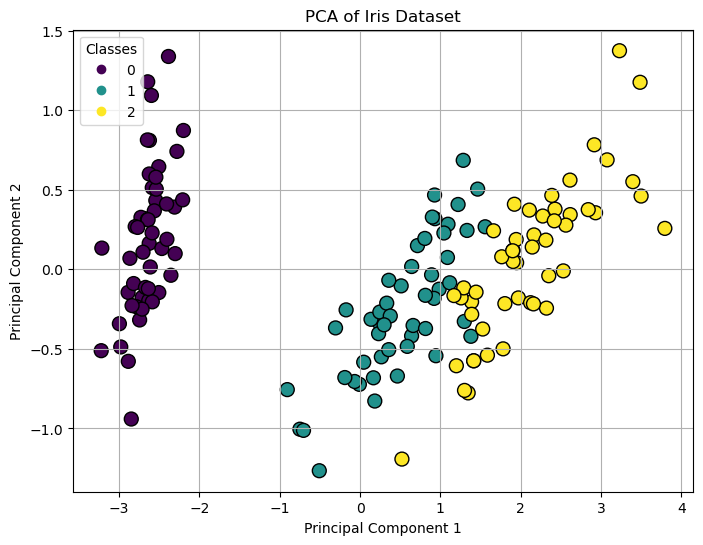

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# Загружаем набор данных Iris
iris = datasets.load_iris()
X = iris.data  # Признаки
y = iris.target  # Метки классов

# Применяем PCA для снижения размерности до 2-х компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализируем результаты
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Добавляем легенду
plt.legend(*scatter.legend_elements(), title="Classes")

plt.grid()
plt.show()

### Задание 2: Сравнение PCA и Factor Analysis.
Используйте набор данных "Wine" из sklearn.datasets. Примените PCA и Factor Analysis, чтобы снизить размерность до 2-х и визуализируйте различия в результатах.

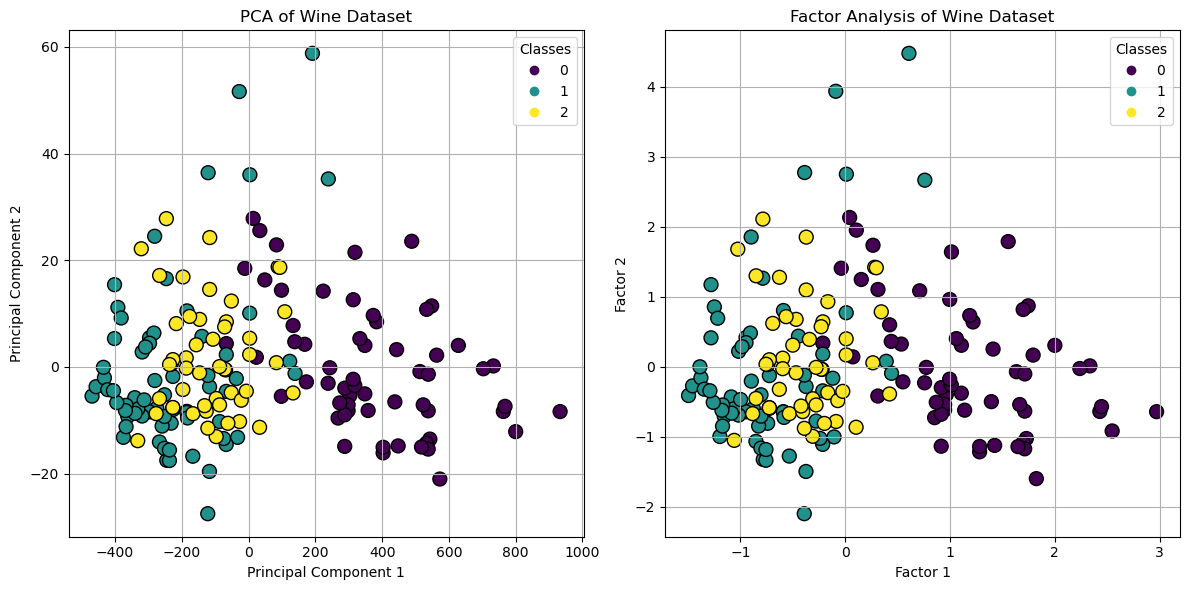

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, FactorAnalysis

# Загружаем набор данных Wine
wine = datasets.load_wine()
X = wine.data  # Признаки
y = wine.target  # Метки классов

# Применяем PCA для снижения размерности до 2-х компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Применяем Factor Analysis для снижения размерности до 2-х компонент
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X)

# Визуализируем результаты PCA
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter1.legend_elements(), title="Classes")  # Исправлено
plt.grid()

# Визуализируем результаты Factor Analysis
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('Factor Analysis of Wine Dataset')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(*scatter2.legend_elements(), title="Classes")  # Исправлено
plt.grid()

plt.tight_layout()
plt.show()

### Задание 3: Исследование влияния предобработки данных на результаты PCA.
Используйте набор данных "Boston Housing" из sklearn.datasets. Примените различные методы предобработки (например, масштабирование, нормализацию) перед применением PCA и сравните полученные результаты.

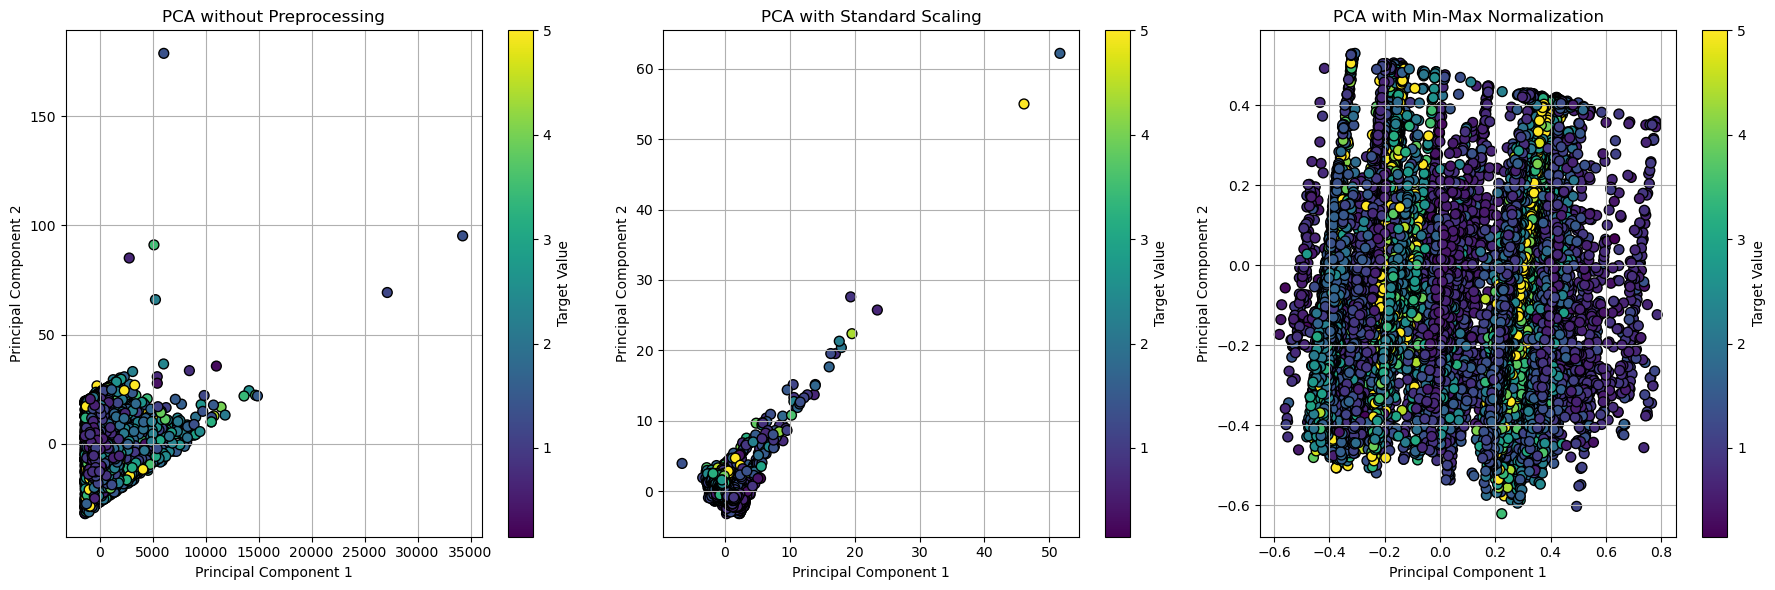

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Загружаем набор данных California Housing
california = datasets.fetch_california_housing()
X = california.data  # Признаки
y = california.target  # Метки классов

# Функция для применения PCA и визуализации результатов
def apply_pca_and_plot(X, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Target Value')
    plt.grid()

# Применяем PCA без предобработки
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
apply_pca_and_plot(X, 'PCA without Preprocessing')

# Применяем масштабирование (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.subplot(1, 3, 2)
apply_pca_and_plot(X_scaled, 'PCA with Standard Scaling')

# Применяем нормализацию (MinMaxScaler)
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X)

plt.subplot(1, 3, 3)
apply_pca_and_plot(X_normalized, 'PCA with Min-Max Normalization')

plt.tight_layout()
plt.show()

### Задание 4: Применение Disciminant Analysis.
Используйте набор данных "Iris" из sklearn.datasets. Примените Linear Discriminant Analysis (LDA) и Quadratic Discriminant Analysis (QDA), чтобы снизить размерность до 2-х и визуализируйте результаты.

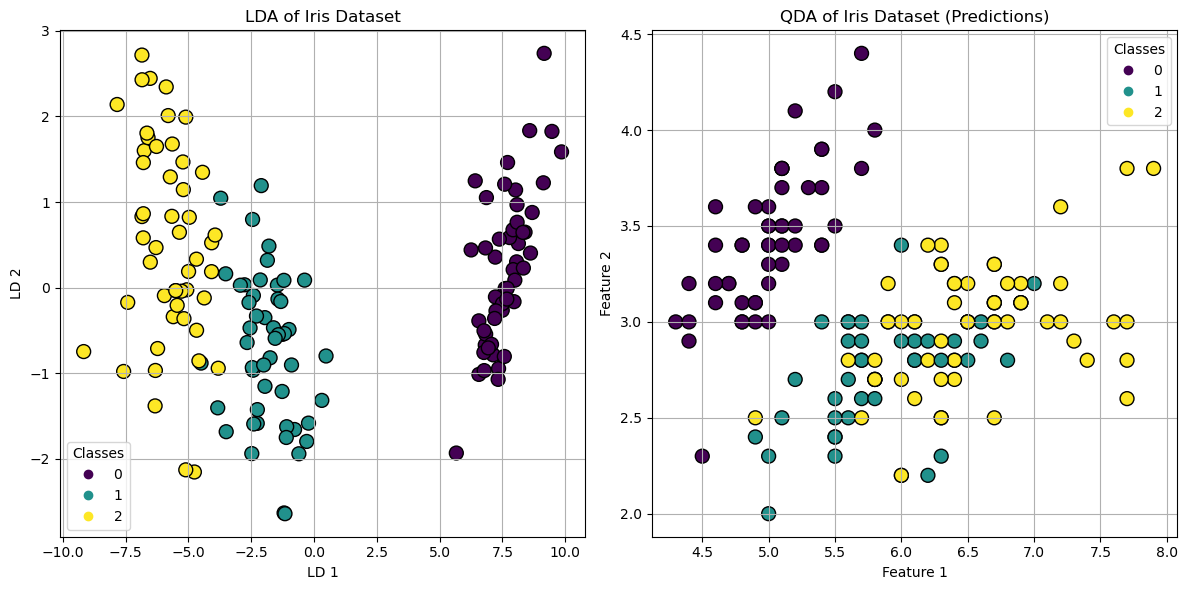

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Загружаем набор данных Iris
iris = datasets.load_iris()
X = iris.data  # Признаки
y = iris.target  # Метки классов

# Применяем LDA для снижения размерности до 2-х компонент
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Применяем QDA для классификации (не снижает размерность)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

# Визуализируем результаты LDA
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('LDA of Iris Dataset')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(*scatter1.legend_elements(), title="Classes")  # Исправлено
plt.grid()

# Визуализируем результаты QDA
plt.subplot(1, 2, 2)
# Для QDA мы можем использовать предсказания для визуализации
# Здесь мы просто визуализируем первые два признака
plt.scatter(X[:, 0], X[:, 1], c=qda.predict(X), cmap='viridis', edgecolor='k', s=100)
plt.title('QDA of Iris Dataset (Predictions)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(*scatter1.legend_elements(), title="Classes")  # Исправлено
plt.grid()

plt.tight_layout()
plt.show()

### Задание 5: Сравнение PCA и LDA.
Используйте любой набор данных с классифицирующей моделью. Примените PCA и LDA и сравните, как влияют эти методы снижения размерности на эффективность классификации.

PCA Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
 [[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]

LDA Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


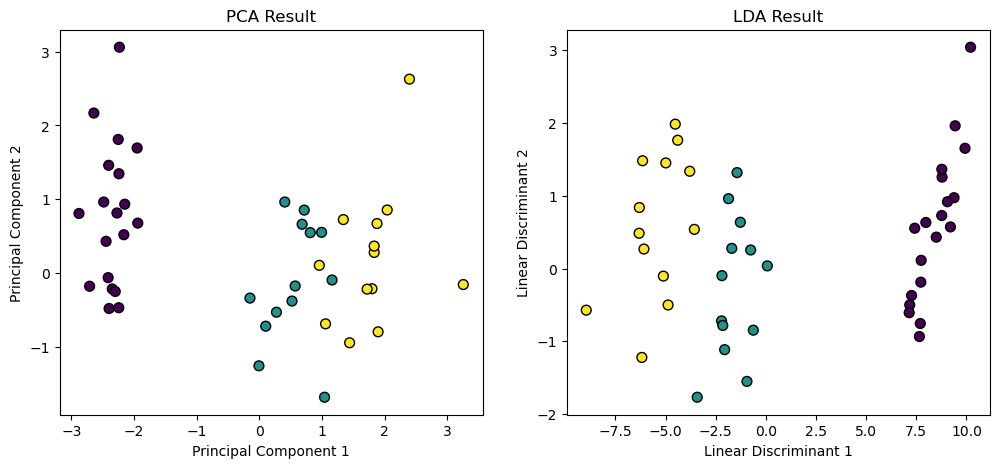

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Загрузка набора данных Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Применение PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Классификация с использованием KNN после PCA
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

# Применение LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Классификация с использованием KNN после LDA
knn_lda = KNeighborsClassifier(n_neighbors=3)
knn_lda.fit(X_train_lda, y_train)
y_pred_lda = knn_lda.predict(X_test_lda)

# Оценка результатов
print("PCA Classification Report:")
print(classification_report(y_test, y_pred_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca))

print("\nLDA Classification Report:")
print(classification_report(y_test, y_pred_lda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))

# Визуализация результатов
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
plt.title('LDA Result')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')

plt.show()

## Нелинейные методы
### Задание 1: Применение метода t-SNE.
Используйте набор данных "Iris" из sklearn.datasets. Примените t-SNE, чтобы снизить размерность до 2-х, и визуализируйте результаты.

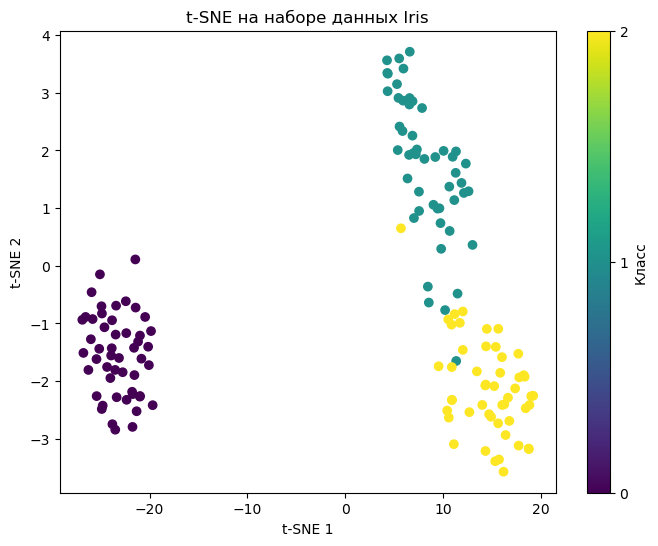

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Визуализация
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE на наборе данных Iris')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Класс')
plt.show()

### Задание 2: Определение влияния параметров t-SNE.
Используйте тот же набор данных "Iris". Примените t-SNE с разными значениями параметров (например, число итераций, learning rate) и сравните полученные результаты.

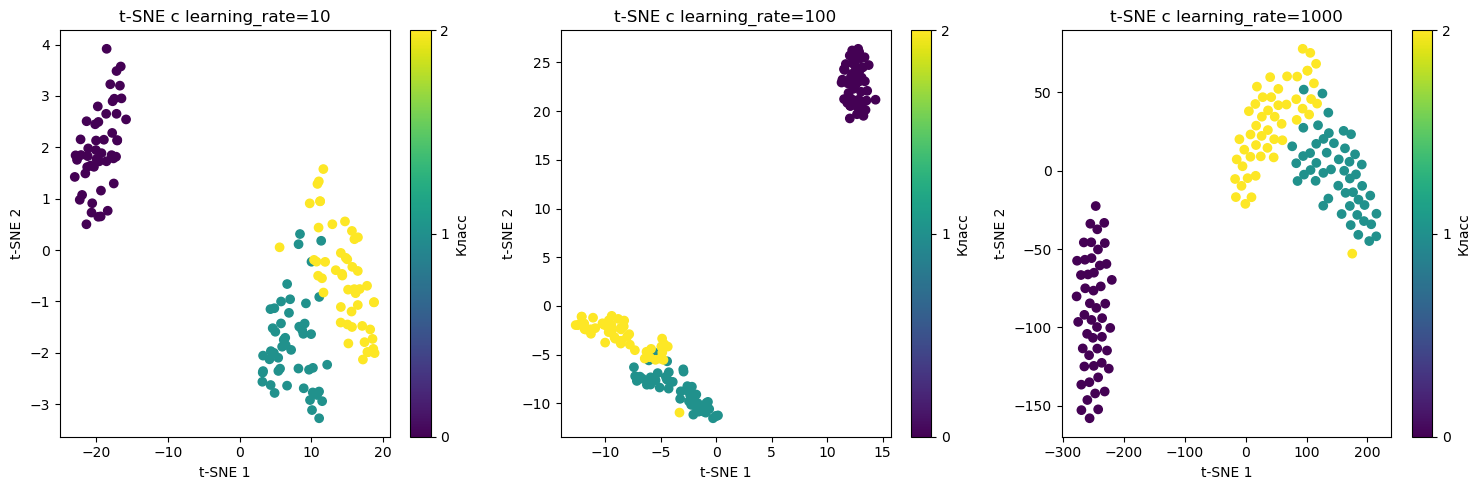

In [39]:
# Применение t-SNE с разными параметрами
learning_rates = [10, 100, 1000]
plt.figure(figsize=(15, 5))

for i, lr in enumerate(learning_rates):
    tsne = TSNE(n_components=2, learning_rate=lr, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    plt.subplot(1, 3, i + 1)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.title(f't-SNE с learning_rate={lr}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.colorbar(scatter, ticks=[0, 1, 2], label='Класс')

plt.tight_layout()
plt.show()

### Задание 3: Сравнение t-SNE и PCA.
Используйте любой набор данных на ваше усмотрение. Примените PCA и t-SNE, чтобы снизить размерность до 2-х, и сравните разницы в результатах визуализации.

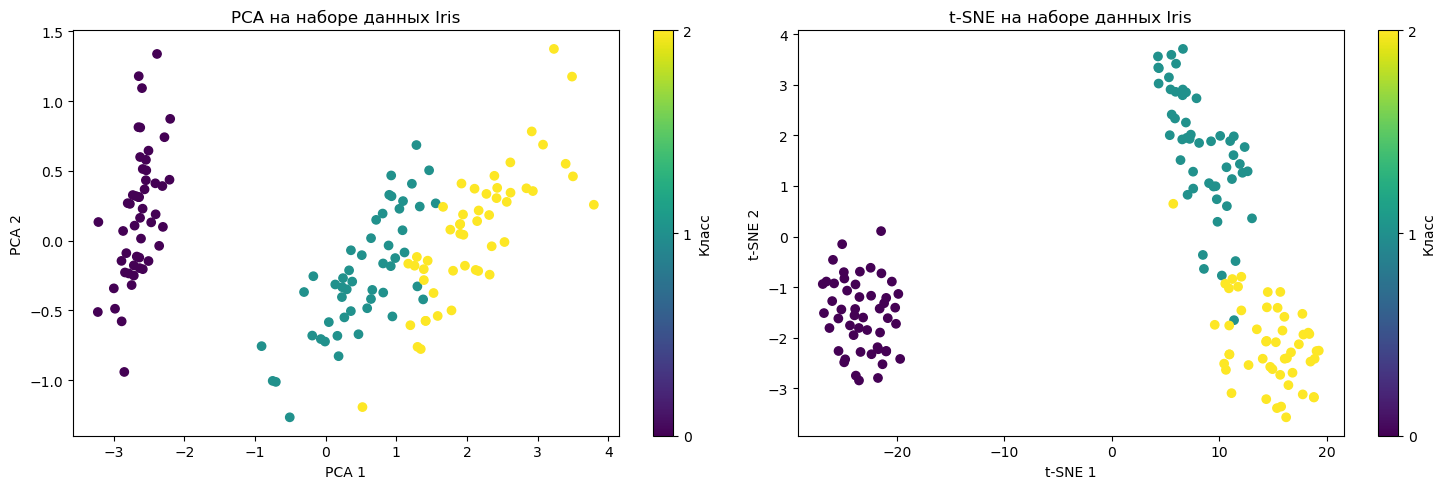

In [40]:
from sklearn.decomposition import PCA

# Применение PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализация PCA и t-SNE
plt.figure(figsize=(15, 5))

# PCA
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA на наборе данных Iris')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Класс')

# t-SNE
plt.subplot(1, 2, 2)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE на наборе данных Iris')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Класс')

plt.tight_layout()
plt.show()

### Задание 4: Применение UMAP.
Используйте набор данных "MNIST" (например, содержащийся в sklearn.datasets). Примените UMAP для снижения размерности и визуализируйте результаты.

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


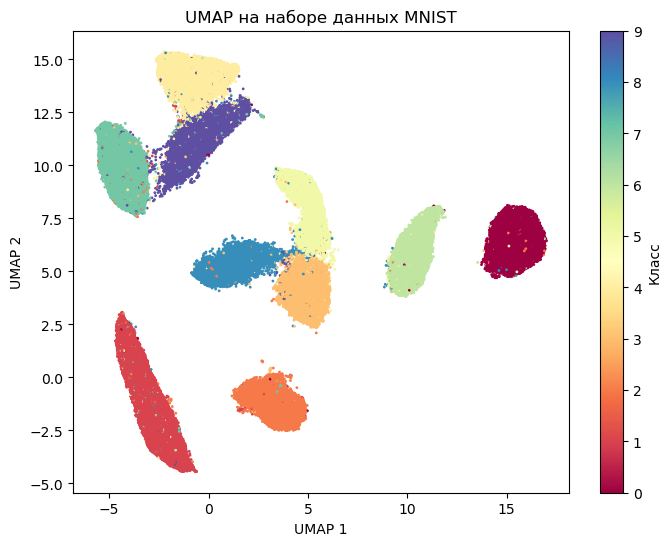

In [47]:
import umap.umap_ as umap

# Загрузка данных MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X_mnist = mnist.data
y_mnist = mnist.target.astype(int)

# Применение UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_mnist)

# Визуализация
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_mnist, cmap='Spectral', s=1)
plt.title('UMAP на наборе данных MNIST')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(scatter, ticks=np.unique(y_mnist), label='Класс')
plt.show()

### Задание 5: Сравнение UMAP и t-SNE.
Используйте один и тот же набор данных для применения UMAP и t-SNE. Сравните влияние этих методов снижения размерности на визуальное разделение классов в данных.

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


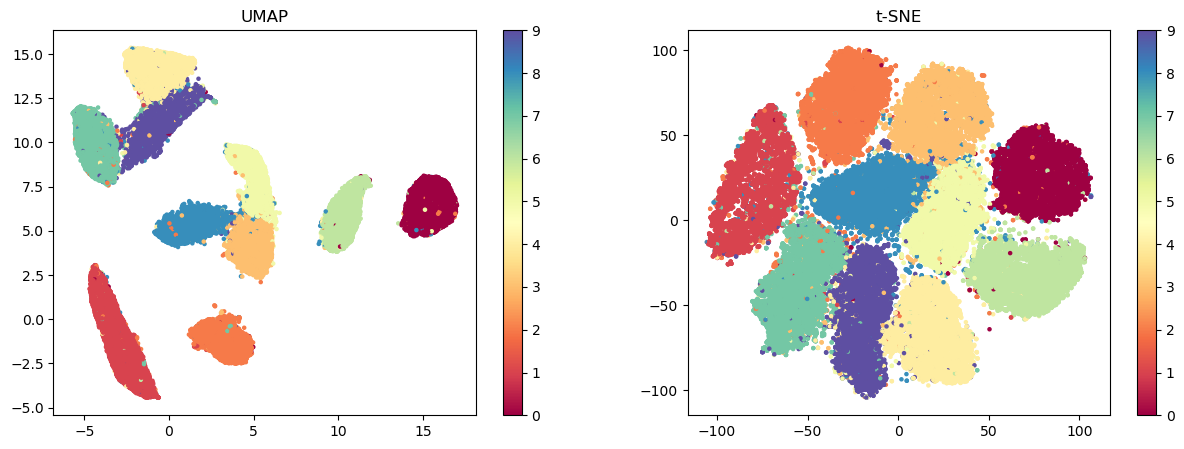

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Загрузка данных MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

# Снижение размерности с помощью UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# Снижение размерности с помощью t-SNE
tsne_model = TSNE(n_components=2, random_state=42)
X_tsne = tsne_model.fit_transform(X)

# Визуализация
plt.figure(figsize=(15, 5))

# UMAP
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='Spectral', s=5)
plt.title('UMAP')
plt.colorbar(scatter)

# t-SNE
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Spectral', s=5)
plt.title('t-SNE')
plt.colorbar(scatter)

plt.show()